In [1]:
# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
import matplotlib.pyplot as plt
%matplotlib inline

%pwd

'/Users/tady/.ghq/github.com/tadyjp/kaggle/titanic'

In [3]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
df_answer = pd.read_csv('data/gender_submission.csv')
df_test = pd.merge(df_test, df_answer, how='inner')
output_file = 'data/output.csv'
df_train.head(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
Survived       418 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 42.5+ KB


In [7]:
names = set()
for name in df_train['Name']:
    names.add(name.split(',')[1].split()[0].replace('.', ''))
for name in df_test['Name']:
    names.add(name.split(',')[1].split()[0].replace('.', ''))

print(names)

{'Jonkheer', 'Mrs', 'Mlle', 'the', 'Rev', 'Don', 'Lady', 'Col', 'Mme', 'Master', 'Dr', 'Dona', 'Mr', 'Ms', 'Major', 'Sir', 'Capt', 'Miss'}


In [8]:
def process(df):
    df = df.copy()

    # dummy Pclass
    dummy_sex = pd.get_dummies(df['Pclass'], prefix='Pclass', drop_first=True)
    df = pd.concat((df, dummy_sex), axis=1)

    # dummy Sex
    dummy_sex = pd.get_dummies(df['Sex'], prefix='Sex', drop_first=True)
    df = pd.concat((df, dummy_sex), axis=1)

    # dummy Embarked
    dummy_embarked = pd.get_dummies(df['Embarked'], prefix='Embarked', drop_first=True)
    df = pd.concat((df, dummy_embarked), axis=1)

    # bin Age
    # age_bins = list(range(0, 80 + 1, 5))
    # age_bins_labels = [str(b) + "-" for b in age_bins[:-1]]
    # age_bins_array = pd.cut(df['Age'], bins=age_bins, labels=age_bins_labels)
    # df_age_bins = pd.DataFrame({'AgeBin': age_bins_array}, columns=('AgeBin',))
    # dummy_age_bins = pd.get_dummies(df_age_bins['AgeBin'], prefix='AgeBin')
    # df = pd.concat((df, dummy_age_bins), axis=1)
    # 
    # df = pd.concat((df, df_age_bins), axis=1)
    
    # Age
    df['Age'].fillna(df['Age'].dropna().median(), inplace=True)
    
    # Families
    df['Families'] = df['SibSp'] + df['Parch'] + 1

    # IsAlone
    df['IsAlone'] = df['Families'] == 1

    # Name title
    df['NameTitle'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
    df['NameTitle'] = df['NameTitle'].replace(
        ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    df['NameTitle'] = df['NameTitle'].replace('Mlle', 'Miss')
    df['NameTitle'] = df['NameTitle'].replace('Ms', 'Miss')
    df['NameTitle'] = df['NameTitle'].replace('Mme', 'Mrs')
    dummy_embarked = pd.get_dummies(df['NameTitle'], prefix='NameTitle')
    df = pd.concat((df, dummy_embarked), axis=1)

    # Fare
    df['Fare'].fillna(df['Fare'].dropna().median(), inplace=True)
    df['FareLog'] = np.log(df['Fare'] + 1)


    # drop
    df = df.drop('PassengerId', axis=1)
    df = df.drop('Pclass', axis=1)
    df = df.drop('Sex', axis=1)
    # df = df.drop('AgeBin', axis=1)
    df = df.drop('Embarked', axis=1)
    df = df.drop('Name', axis=1)
    df = df.drop('NameTitle', axis=1)
    df = df.drop('Ticket', axis=1)
    df = df.drop('Cabin', axis=1)
    df = df.drop('Fare', axis=1)
    # df = df.drop('Age', axis=1)

    return df


df_train_processed = process(df_train)
df_train_processed.head()


,Survived,Age,SibSp,Parch,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Families,IsAlone,NameTitle_Master,NameTitle_Miss,NameTitle_Mr,NameTitle_Mrs,NameTitle_Rare,FareLog
0,0,22.0,1,0,0,1,1,0,1,2,False,0,0,1,0,0,2.110213
1,1,38.0,1,0,0,0,0,0,0,2,False,0,0,0,1,0,4.280593
2,1,26.0,0,0,0,1,0,0,1,1,True,0,1,0,0,0,2.188856
3,1,35.0,1,0,0,0,0,0,1,2,False,0,0,0,1,0,3.990834
4,0,35.0,0,0,0,1,1,0,1,1,True,0,0,1,0,0,2.202765


In [9]:
df_train_processed.describe()

,Survived,Age,SibSp,Parch,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Families,NameTitle_Master,NameTitle_Miss,NameTitle_Mr,NameTitle_Mrs,NameTitle_Rare,FareLog
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,29.361582,0.523008,0.381594,0.206510,0.551066,0.647587,0.086420,0.722783,1.904602,0.044893,0.207632,0.580247,0.141414,0.025814,2.962246
std,0.486592,13.019697,1.102743,0.806057,0.405028,0.497665,0.477990,0.281141,0.447876,1.613459,0.207186,0.405840,0.493796,0.348644,0.158668,0.969048
min,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.187218
50%,0.000000,28.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.737881
75%,1.000000,35.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,3.465736
max,1.000000,80.000000,8.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,11.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.240917


In [10]:
df_train_processed.corr()

,Survived,Age,SibSp,Parch,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Families,IsAlone,NameTitle_Master,NameTitle_Miss,NameTitle_Mr,NameTitle_Mrs,NameTitle_Rare,FareLog
Survived,1.000000,-0.064910,-0.035322,0.081629,0.093349,-0.322308,-0.543351,0.003650,-0.155660,0.016639,-0.203367,0.085221,0.335636,-0.549199,0.341994,-0.012054,0.329862
Age,-0.064910,1.000000,-0.233296,-0.172482,0.015831,-0.291955,0.081163,-0.031415,-0.014665,-0.245619,0.171647,-0.373960,-0.248559,0.180808,0.167687,0.192912,0.110964
SibSp,-0.035322,-0.233296,1.000000,0.414838,-0.055932,0.092548,-0.114631,-0.026354,0.070941,0.890712,-0.584471,0.349559,0.083462,-0.250489,0.061668,-0.025874,0.318528
Parch,0.081629,-0.172482,0.414838,1.000000,-0.000734,0.015790,-0.245489,-0.081228,0.063036,0.783111,-0.583398,0.267344,0.100998,-0.333905,0.223575,-0.059535,0.332186
Pclass_2,0.093349,0.015831,-0.055932,-0.000734,1.000000,-0.565210,-0.064746,-0.127301,0.192061,-0.038594,-0.039070,0.009903,-0.021903,-0.088569,0.119193,0.056827,-0.039771
Pclass_3,-0.322308,-0.291955,0.092548,0.015790,-0.565210,1.000000,0.137143,0.237449,-0.009511,0.071142,0.129472,0.064918,0.000293,0.155907,-0.177658,-0.180349,-0.539071
Sex_male,-0.543351,0.081163,-0.114631,-0.245489,-0.064746,0.137143,1.000000,-0.074115,0.125722,-0.200988,0.303646,0.159934,-0.693916,0.867334,-0.550146,0.075638,-0.263276
Embarked_Q,0.003650,-0.031415,-0.026354,-0.081228,-0.127301,0.237449,-0.074115,1.000000,-0.496624,-0.058592,0.086464,0.010478,0.167531,-0.078338,-0.090432,0.000311,-0.160456
Embarked_S,-0.155660,-0.014665,0.070941,0.063036,0.192061,-0.009511,0.125722,-0.496624,1.000000,0.079977,0.024929,0.025291,-0.140414,0.118482,-0.007704,-0.025678,-0.135938
Families,0.016639,-0.245619,0.890712,0.783111,-0.038594,0.071142,-0.200988,-0.058592,0.079977,1.000000,-0.690922,0.372472,0.107500,-0.338014,0.153842,-0.047426,0.383658


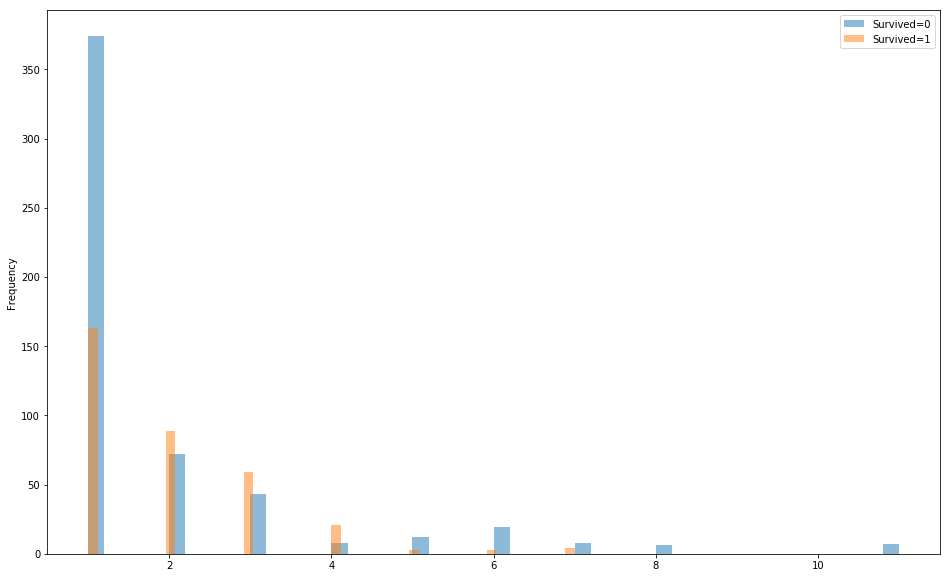

In [11]:
ax = df_train_processed[df_train_processed['Survived'] == 0].plot.hist(y='Families', label='Survived=0', bins=50, alpha=0.5, figsize=(16, 10))
ax = df_train_processed[df_train_processed['Survived'] == 1].plot.hist(y='Families', label='Survived=1', bins=50, alpha=0.5, ax=ax)

In [12]:
X_train, y_train = df_train_processed.drop('Survived', axis=1), df_train_processed['Survived']
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.4, random_state=42)

df_test_processed = process(df_test)
X_test, y_test = df_test_processed.drop('Survived', axis=1), df_test_processed['Survived']
df_test_processed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 17 columns):
Age                 418 non-null float64
SibSp               418 non-null int64
Parch               418 non-null int64
Survived            418 non-null int64
Pclass_2            418 non-null uint8
Pclass_3            418 non-null uint8
Sex_male            418 non-null uint8
Embarked_Q          418 non-null uint8
Embarked_S          418 non-null uint8
Families            418 non-null int64
IsAlone             418 non-null bool
NameTitle_Master    418 non-null uint8
NameTitle_Miss      418 non-null uint8
NameTitle_Mr        418 non-null uint8
NameTitle_Mrs       418 non-null uint8
NameTitle_Rare      418 non-null uint8
FareLog             418 non-null float64
dtypes: bool(1), float64(2), int64(4), uint8(10)
memory usage: 27.3 KB


In [13]:
def cross_validate(clf, data, label):
    skf = StratifiedKFold(n_splits=5, random_state=42)
    scores = []
    for train_ix, test_ix in skf.split(data, label):  # テストデータを分割し、順次処理
        clf.fit(data.loc[train_ix], label.loc[train_ix])  # 予測モデルの構築
        score = clf.score(data.loc[test_ix], label.loc[test_ix])  # 予測モデルの精度評価を検証データで行う。
        scores.append(score)
    return np.mean(scores), np.std(scores)


In [14]:
models = {
    'LogReg': LogisticRegression(),
    'SVC': SVC(),
    'kNN(3)': KNeighborsClassifier(n_neighbors=3),
    'kNN(4)': KNeighborsClassifier(n_neighbors=4),
    'kNN(5)': KNeighborsClassifier(n_neighbors=5),
    'GaussianNB': GaussianNB(),
    'Perceptron(5)': Perceptron(max_iter=5, tol=None),
    'Perceptron(30)': Perceptron(max_iter=30, tol=None),
    'LinearSVC': LinearSVC(),
    'SGDClassifier(5)': SGDClassifier(max_iter=5, tol=None),
    'SGDClassifier(30)': SGDClassifier(max_iter=30, tol=None),
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RF(100)': RandomForestClassifier(n_estimators=100),
    'RF(200)': RandomForestClassifier(n_estimators=200),
    'RF(300)': RandomForestClassifier(n_estimators=300),
    'LightGBM': lgb.LGBMClassifier(objective='binary', metric='binary_error', num_leaves=200, learning_rate=0.003)
}

best_score = 0
best_model_name = None

print('score:')
for name, model in models.items():
    score, std = cross_validate(model, X_train, y_train)
        
    print(f'\t{name} = {round(score, 3)} (+/- {round(std, 6)})')
    
    if best_score < score:
        best_score = score
        best_model_name = name

print(f'best_model = {best_model_name}')

score:
	LogReg = 0.824 (+/- 0.0255)


	SVC = 0.819 (+/- 0.015132)
	kNN(3) = 0.795 (+/- 0.014882)


	kNN(4) = 0.787 (+/- 0.014611)
	kNN(5) = 0.795 (+/- 0.024556)


	GaussianNB = 0.808 (+/- 0.021968)
	Perceptron(5) = 0.667 (+/- 0.140681)
	Perceptron(30) = 0.636 (+/- 0.16157)


	LinearSVC = 0.808 (+/- 0.044537)
	SGDClassifier(5) = 0.697 (+/- 0.064858)
	SGDClassifier(30) = 0.604 (+/- 0.175017)
	DecisionTreeClassifier = 0.776 (+/- 0.023406)


	RF(100) = 0.806 (+/- 0.036881)


	RF(200) = 0.807 (+/- 0.035059)


	RF(300) = 0.809 (+/- 0.030199)


/Users/tady/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


/Users/tady/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


/Users/tady/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


/Users/tady/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


	LightGBM = 0.783 (+/- 0.013047)
best_model = LogReg


/Users/tady/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [15]:
# model = models[best_model_name]
model = models['LogReg']

model.fit(X_train, y_train)

X_test.head()


,Age,SibSp,Parch,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S,Families,IsAlone,NameTitle_Master,NameTitle_Miss,NameTitle_Mr,NameTitle_Mrs,NameTitle_Rare,FareLog
0,34.5,0,0,0,1,1,1,0,1,True,0,0,1,0,0,2.178064
1,47.0,1,0,0,1,0,0,1,2,False,0,0,0,1,0,2.079442
2,62.0,0,0,1,0,1,1,0,1,True,0,0,1,0,0,2.369075
3,27.0,0,0,0,1,1,0,1,1,True,0,0,1,0,0,2.268252
4,22.0,1,1,0,1,0,0,1,3,False,0,0,0,1,0,2.586824


In [16]:
y_pred = model.predict(X_test)


In [17]:
submission = pd.DataFrame({
    'PassengerId': df_test['PassengerId'],
    'Survived': y_pred
})
submission.to_csv(output_file, index=False)
submission.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0
